# IOU Service Area Maps

In [1]:
# imports
import boto3
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point
import sys  # Used for progress bar
from case_study_eval_utils import *
from figure_utils import *
import datetime
import sys
import os

# Import qaqc stage plot functions
sys.path.append(os.path.abspath("../scripts/3_qaqc_data"))
from qaqc_plot import flagged_timeseries_plot, _plot_format_helper, id_flag

# Set AWS credentials
s3 = boto3.resource("s3")
s3_cl = boto3.client("s3")  # for lower-level processes

# Set relative paths to other folders and objects in repository.
BUCKET_NAME = "wecc-historical-wx"
QAQC_DIR = "3_qaqc_wx"
MERGE_DIR = "4_merge_wx"
stations_csv_path = f"s3://{BUCKET_NAME}/{QAQC_DIR}/all_network_stationlist_qaqc.csv"

## Setup

In [ ]:

# read in merge station list
stn_list = pd.read_csv(
    "s3://wecc-historical-wx/4_merge_wx/all_network_stationlist_merge.csv"
)

In [ ]:
# convert it into geodataframe
stns_gdf = gpd.GeoDataFrame(
    stn_list,
    geometry=gpd.points_from_xy(stn_list.longitude, stn_list.latitude, crs="EPSG:4326"),
)

In [ ]:
# read in IOU service territories shapefile

# read in  CA county boundaries shapefile
service_territories = gpd.read_file(
    "s3://wecc-historical-wx/0_maps/California_Natural_Gas_Service_Area/"
)
service_territories = service_territories.to_crs(stns_gdf.crs)  # Convert to station CRS

## PG&E

### Filter stations

In [ ]:
# define the event geometry - we'll focus on one county for now (San Diego - where the largest fires occurred)
pge_geom = service_territories[
    service_territories["ABR"] == ("PG&E")
]

In [ ]:
# filter down to stations that are in the target service territory
stns_gdf["intersects"] = stns_gdf.intersects(
    pge_geom.unary_union
)  # See which stations intersect with the target polygon

In [ ]:
pge_stns = stns_gdf[stns_gdf["intersects"] == True].reset_index(
    drop=True
)  # Get just those stations, drop the others

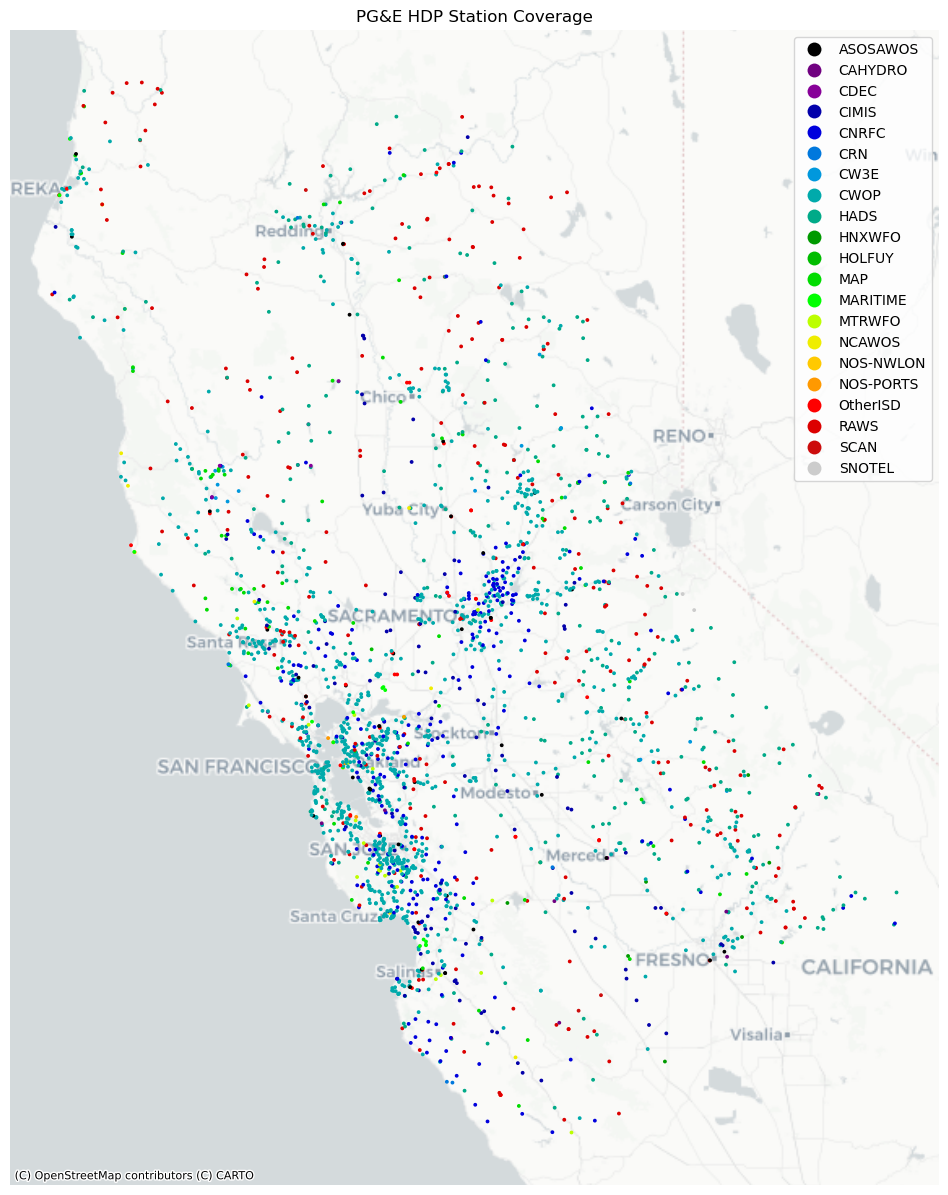

In [2]:
get_station_map('PG&E',save_local=True)

In [ ]:
len(pge_stns)

## SDG&E

In [ ]:
# define the event geometry - we'll focus on one county for now (San Diego - where the largest fires occurred)
sdge_geom = service_territories[service_territories["ABR"] == ("SDG&E")]

In [ ]:
# filter down to stations that are in the target service territory
stns_gdf["intersects"] = stns_gdf.intersects(
    sdge_geom.unary_union
)  # See which stations intersect with the target polygon

In [ ]:
sdge_stns = stns_gdf[stns_gdf["intersects"] == True].reset_index(
    drop=True
)  # Get just those stations, drop the others

In [ ]:
get_station_map("SDG&E")

In [ ]:
len(sdge_stns)

## SoCalGas

In [ ]:
# define the event geometry - we'll focus on one county for now (San Diego - where the largest fires occurred)
scg_geom = service_territories[
    service_territories["ABR"] == ("SCG")
]

In [ ]:
# filter down to stations that are in the target service territory
stns_gdf["intersects"] = stns_gdf.intersects(
    scg_geom.unary_union
)  # See which stations intersect with the target polygon

In [ ]:
scg_stns = stns_gdf[stns_gdf["intersects"] == True].reset_index(
    drop=True
)  # Get just those stations, drop the others

In [ ]:
get_station_map("SCG")

In [ ]:
len(scg_stns)